# Sistema de predição com base em técnicas de Aprendizado de Máquina

## 1. Coleta de Dados

### Os dados foram obtidos pela plataforma [Kaggle](https://www.kaggle.com/datasets/utkarshsharma11r/student-mental-health-analysis).

Este conjunto de dados reúne respostas de estudantes relacionadas à sua saúde mental durante o período de ensino remoto. As informações foram coletadas por meio de questionários e abordam diversos aspectos psicológicos e comportamentais impactados pela educação a distância. 

Dados inclusos: dados demográficos, tempo de tela, duração do sono, prática de atividade física, nível de estresse, ansiedade pré-prova e percepção sobre o desempenho acadêmico.

Objetivo: **Classificação (predição) do nível de estresse dos estudantes com base em variáveis psico-comportamentais.**

In [6]:
import pandas as pd

#Leitura do arquivo CSV
df = pd.read_csv('../datasets/dados_origem.csv')

# Visualização dos dados
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


Com base na descrição fornecida pelo autor, as colunas serão renomeadas para facilitação do entendimento.

1. Name: Nome do estudante
2. Gender: Gênero do respondente (Masculino/Feminino)
3. Age: Idade em anos
4. Education Level: Nível acadêmico (ex.: 8ª série, BTech, Mestrado)
5. Screen Time (hrs/day): Tempo médio de tela por dia durante o ensino online
6. Sleep Duration (hrs): Duração média de sono por dia
7. Physical Activity (hrs/week): Tempo semanal de atividade física
8. Stress Level: Nível de estresse relatado (Baixo, Médio, Alto)
9. Anxious Before Exams: Se o estudante se sente ansioso antes das provas (Sim/Não)
10. Academic Performance Change: Mudança percebida no desempenho acadêmico

In [7]:
# Dicionário de mapeamento (inglês para português simplificado)
mapeamento_colunas = {
    'Name': 'Nome_Estudante',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Education Level': 'Nivel_Academico',
    'Screen Time (hrs/day)': 'Tempo_Tela_h_dia',
    'Sleep Duration (hrs)': 'Duracao_Sono_h_dia',
    'Physical Activity (hrs/week)': 'Atividade_Fisica_h_semana',
    'Stress Level': 'Nivel_Estresse',
    'Anxious Before Exams': 'Ansiedade_Antes_Provas',
    'Academic Performance Change': 'Mudanca_Desempenho_Academico'
}

# Renomear as colunas
df = df.rename(columns=mapeamento_colunas)

# Verificar o resultado
df.head()

,Nome_Estudante,Genero,Idade,Nivel_Academico,Tempo_Tela_h_dia,Duracao_Sono_h_dia,Atividade_Fisica_h_semana,Nivel_Estresse,Ansiedade_Antes_Provas,Mudanca_Desempenho_Academico
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


Agora 1 variável será removida do estudo:  
- Nome do estudante, pois não é relevante para a análise e pode ser anonimizado para preservar a privacidade dos participantes.

In [8]:
# Remover coluna desnecessária
df = df.drop(columns=['Nome_Estudante'])
# Verificar o resultado
df.head()

,Genero,Idade,Nivel_Academico,Tempo_Tela_h_dia,Duracao_Sono_h_dia,Atividade_Fisica_h_semana,Nivel_Estresse,Ansiedade_Antes_Provas,Mudanca_Desempenho_Academico
0,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


## 2. Análises do conjunto de dados

Há dados faltantes na base de dados?

In [9]:
dados_faltantes = df.isnull().sum()

# Verificar se há dados faltantes
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
Genero                          0
Idade                           0
Nivel_Academico                 0
Tempo_Tela_h_dia                0
Duracao_Sono_h_dia              0
Atividade_Fisica_h_semana       0
Nivel_Estresse                  0
Ansiedade_Antes_Provas          0
Mudanca_Desempenho_Academico    0
dtype: int64


In [10]:
#É possível verificar o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        1000 non-null   object 
 1   Idade                         1000 non-null   int64  
 2   Nivel_Academico               1000 non-null   object 
 3   Tempo_Tela_h_dia              1000 non-null   float64
 4   Duracao_Sono_h_dia            1000 non-null   float64
 5   Atividade_Fisica_h_semana     1000 non-null   float64
 6   Nivel_Estresse                1000 non-null   object 
 7   Ansiedade_Antes_Provas        1000 non-null   object 
 8   Mudanca_Desempenho_Academico  1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


**Dicionário de Siglas para o Nível Acadêmico (Education Level)**

No conjunto de dados, a coluna **Education Level** contém siglas que representam diferentes níveis de formação acadêmica dos estudantes. Para facilitar a interpretação e análise dos dados, utilizamos o seguinte dicionário para mapear essas siglas para seus significados completos:

| Sigla        | Significado                                  |
|--------------|---------------------------------------------|
| Class 8      | 8ª série / Ensino Fundamental II            |
| Class 9      | 9ª série / Ensino Fundamental II            |
| Class 10     | 10ª série / Ensino Médio                     |
| Class 11     | 11ª série / Ensino Médio                     |
| Class 12     | 12ª série / Ensino Médio                     |
| BTech        | Bacharelado em Tecnologia / Graduação       |
| BSc          | Bacharelado em Ciências / Graduação          |
| MSc          | Mestrado em Ciências                         |
| PhD          | Doutorado                                    |
| Diploma      | Diploma Técnico ou Profissionalizante       |
| High School  | Ensino Médio                                 |
| Undergraduate| Graduação                                    |
| Postgraduate | Pós-Graduação                                |

Esse mapeamento ajuda a entender melhor os dados e a categorizar corretamente os níveis acadêmicos durante a análise exploratória e a modelagem preditiva.

In [11]:
# Dicionário de siglas para Education Level
education_level_siglas = {
    'Class 8': '8ª série / Ensino Fundamental II',
    'Class 9': '9ª série / Ensino Fundamental II',
    'Class 10': '10ª série / Ensino Médio',
    'Class 11': '11ª série / Ensino Médio',
    'Class 12': '12ª série / Ensino Médio',
    'BTech': 'Bacharelado em Tecnologia / Graduação',
    'BSc': 'Bacharelado em Ciências / Graduação',
    'MSc': 'Mestrado em Ciências',
    'PhD': 'Doutorado',
    'Diploma': 'Diploma Técnico ou Profissionalizante',
    'High School': 'Ensino Médio',
    'Undergraduate': 'Graduação',
    'Postgraduate': 'Pós-Graduação'
}


Qual a distribuição de estudantes de acordo com o nível educacional?

In [13]:
df['Nivel_Academico'].value_counts()

Nivel_Academico
MTech       143
MSc         138
MA          129
Class 11     88
Class 9      87
Class 10     87
BSc          85
BTech        84
BA           62
Class 8      50
Class 12     47
Name: count, dtype: int64

Qual a distribuição de estudantes por gênero?

In [14]:
df['Genero'].value_counts() 

Genero
Male      475
Female    475
Other      50
Name: count, dtype: int64

Qual a faixa etária mais comum entre os estudantes?

In [15]:
df['Idade'].value_counts()

Idade
15    94
17    92
23    91
21    89
16    88
20    87
19    82
26    78
22    77
25    76
24    75
18    71
Name: count, dtype: int64

Qual a média e distribuição do tempo médio de sono diário dos estudantes?

In [19]:
df['Duracao_Sono_h_dia'].describe()

count    1000.000000
mean        6.450800
std         1.466407
min         4.000000
25%         5.100000
50%         6.500000
75%         7.700000
max         9.000000
Name: Duracao_Sono_h_dia, dtype: float64

Qual a distribuição dos níveis de estresse relatados?

In [24]:
df['Nivel_Estresse'].value_counts() 

Nivel_Estresse
Medium    492
Low       327
High      181
Name: count, dtype: int64

Quantos estudantes se sentem ansiosos antes das provas?

In [25]:
df['Ansiedade_Antes_Provas'].value_counts()

Ansiedade_Antes_Provas
Yes    513
No     487
Name: count, dtype: int64

Qual a distribuição das mudanças percebidas no desempenho acadêmico?

In [26]:
df['Mudanca_Desempenho_Academico'].value_counts()

Mudanca_Desempenho_Academico
Same        399
Improved    303
Declined    298
Name: count, dtype: int64

Qual a média, mediana e desvio padrão do tempo médio diário de tela durante o ensino online?

In [18]:
df['Tempo_Tela_h_dia'].describe()

count    1000.000000
mean        6.909200
std         2.907106
min         2.000000
25%         4.400000
50%         6.900000
75%         9.500000
max        12.000000
Name: Tempo_Tela_h_dia, dtype: float64

### Visualização Gráfica dos Dados

Além da análise numérica, a visualização gráfica é uma ferramenta essencial para compreender melhor os padrões e tendências presentes no conjunto de dados. A seguir, apresentaremos algumas representações visuais que facilitam a interpretação das informações coletadas, tornando a análise mais intuitiva e detalhada.


**Histograma da Prática de Atividade Física**

A prática de atividade física semanal é um dos indicadores comportamentais analisados. No histograma abaixo, visualizamos a distribuição da quantidade de horas semanais dedicadas ao exercício físico pelos estudantes. A linha pontilhada vermelha representa a média geral.

Essa visualização nos ajuda a entender quantos estudantes mantêm uma rotina ativa e como os valores se distribuem.

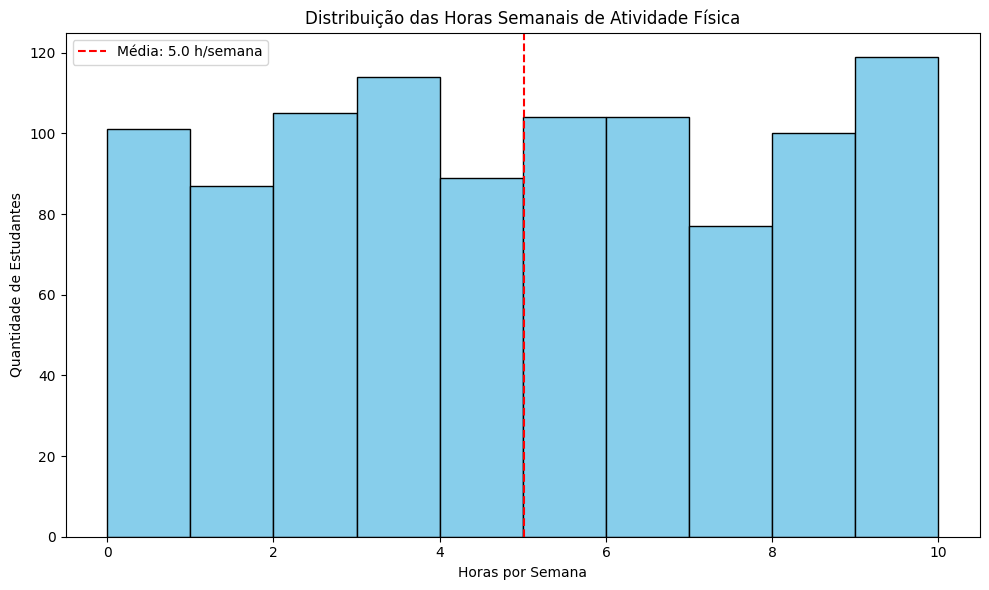

In [34]:
import matplotlib.pyplot as plt

# Dados
dados = df['Atividade_Fisica_h_semana']

# Criação do histograma
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=10, color='skyblue', edgecolor='black')

# Média
media = dados.mean()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.1f} h/semana')

# Títulos e rótulos
plt.title('Distribuição das Horas Semanais de Atividade Física')
plt.xlabel('Horas por Semana')
plt.ylabel('Quantidade de Estudantes')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


**Boxplot das Horas Semanais de Atividade Física**

O gráfico abaixo apresenta um boxplot que representa a distribuição do tempo semanal dedicado à prática de atividade física pelos estudantes.

Com ele, é possível identificar a mediana, a dispersão (quartis), além de valores extremos (outliers), oferecendo uma visão clara da variação nos hábitos de exercício físico dentro da amostra analisada.


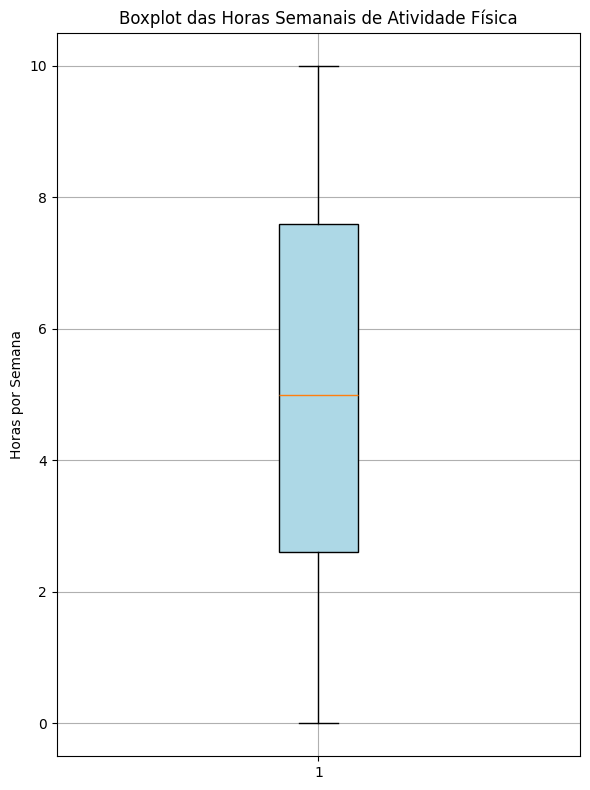

In [37]:
# Dados
dados = df['Atividade_Fisica_h_semana']

# Criação do boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(dados, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Títulos e rótulos
plt.title('Boxplot das Horas Semanais de Atividade Física')
plt.ylabel('Horas por Semana')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


**Boxplot do Tempo Médio Diário de Tela**

O gráfico abaixo apresenta a distribuição do tempo médio diário que os estudantes passaram em frente a telas durante o período de ensino online.

Além do boxplot, foram calculadas as seguintes medidas descritivas:

- **Média:** aproximadamente 6.91 h/dia
- **Mediana:** aproximadamente 6.90 h/dia
- **Desvio padrão:** aproximadamente 2.91 h/dia

Essas informações ajudam a compreender a intensidade de exposição digital entre os estudantes e sua possível relação com a saúde mental.



Média: 6.91 h/dia
Mediana: 6.90 h/dia
Desvio padrão: 2.91 h/dia


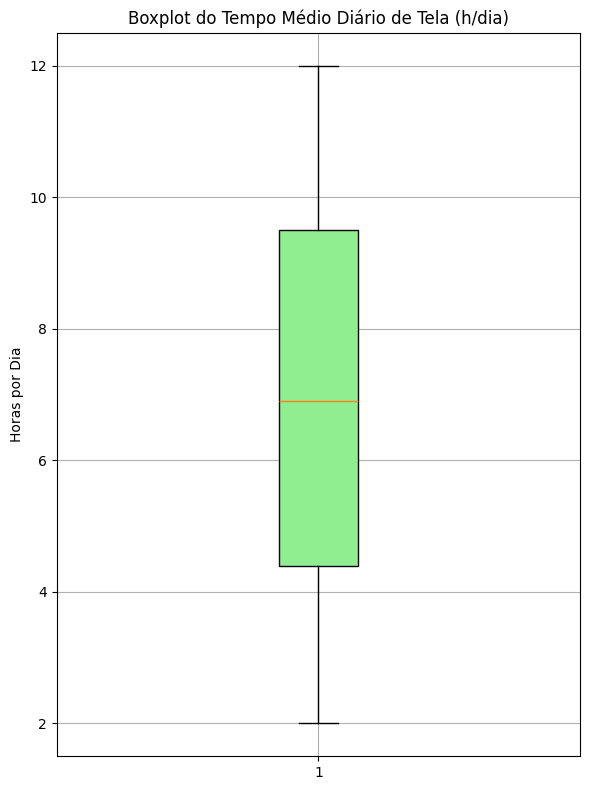

In [36]:
# Dados
dados_tela = df['Tempo_Tela_h_dia']

# Estatísticas descritivas
media = dados_tela.mean()
mediana = dados_tela.median()
desvio = dados_tela.std()

# Exibição dos valores
print(f"Média: {media:.2f} h/dia")
print(f"Mediana: {mediana:.2f} h/dia")
print(f"Desvio padrão: {desvio:.2f} h/dia")

# Criação do boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(dados_tela, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

# Títulos e rótulos
plt.title('Boxplot do Tempo Médio Diário de Tela (h/dia)')
plt.ylabel('Horas por Dia')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Tratamento de dados categóricos

**Importante!** Algumas variáveis do conjunto de dados são do tipo object, ou seja, categóricas. Para aplicar técnicas de Aprendizado de Máquina, é necessário convertê-las para uma representação numérica.

Será utilizada a ferramenta LabelEncoder da biblioteca scikit-learn para transformar essas variáveis, respeitando o seguinte processo:

1. Inicialização do codificador.
2. Transformação de cada variável categórica individualmente.
3. Armazenamento do mapeamento entre os rótulos originais e os valores numéricos.

Variáveis a ser transformadas:


| Genero                           |
| Nivel_Academico                  |
| Nivel_Estresse                   |
| Ansiedade_Antes_Provas           |
| Mudanca_Desempenho_Academico     |


Para cada uma delas, será criado um dicionário de mapeamento, o que permite manter a interpretação dos dados após a transformação.

Esse processo garante que o conjunto de dados esteja pronto para futuras análises estatísticas ou modelos de predição.


In [38]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o codificador
encoder = LabelEncoder()

# Transformar e mapear as variáveis categóricas
# 1. Gênero
df['Genero'] = encoder.fit_transform(df['Genero'])
mapeamento_genero = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Genero':", mapeamento_genero)

# 2. Nível Acadêmico
df['Nivel_Academico'] = encoder.fit_transform(df['Nivel_Academico'])
mapeamento_nivel = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Nivel_Academico':", mapeamento_nivel)

# 3. Nível de Estresse
df['Nivel_Estresse'] = encoder.fit_transform(df['Nivel_Estresse'])
mapeamento_estresse = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Nivel_Estresse':", mapeamento_estresse)

# 4. Ansiedade Antes das Provas
df['Ansiedade_Antes_Provas'] = encoder.fit_transform(df['Ansiedade_Antes_Provas'])
mapeamento_ansiedade = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Ansiedade_Antes_Provas':", mapeamento_ansiedade)

# 5. Mudança no Desempenho Acadêmico
df['Mudanca_Desempenho_Academico'] = encoder.fit_transform(df['Mudanca_Desempenho_Academico'])
mapeamento_desempenho = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapeamento para 'Mudanca_Desempenho_Academico':", mapeamento_desempenho)

Mapeamento para 'Genero': {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Mapeamento para 'Nivel_Academico': {'BA': np.int64(0), 'BSc': np.int64(1), 'BTech': np.int64(2), 'Class 10': np.int64(3), 'Class 11': np.int64(4), 'Class 12': np.int64(5), 'Class 8': np.int64(6), 'Class 9': np.int64(7), 'MA': np.int64(8), 'MSc': np.int64(9), 'MTech': np.int64(10)}
Mapeamento para 'Nivel_Estresse': {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Mapeamento para 'Ansiedade_Antes_Provas': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapeamento para 'Mudanca_Desempenho_Academico': {'Declined': np.int64(0), 'Improved': np.int64(1), 'Same': np.int64(2)}


In [39]:
df.head()

,Genero,Idade,Nivel_Academico,Tempo_Tela_h_dia,Duracao_Sono_h_dia,Atividade_Fisica_h_semana,Nivel_Estresse,Ansiedade_Antes_Provas,Mudanca_Desempenho_Academico
0,1,15,6,7.1,8.9,9.3,2,0,2
1,0,25,9,3.3,5.0,0.2,2,0,2
2,1,20,2,9.5,5.4,6.2,2,0,2
3,1,20,0,10.8,5.6,5.5,0,1,2
4,0,17,4,2.8,5.4,3.1,2,1,2


In [41]:
# Verificação se todas as variáveis são numéricas
df.dtypes

Genero                            int64
Idade                             int64
Nivel_Academico                   int64
Tempo_Tela_h_dia                float64
Duracao_Sono_h_dia              float64
Atividade_Fisica_h_semana       float64
Nivel_Estresse                    int64
Ansiedade_Antes_Provas            int64
Mudanca_Desempenho_Academico      int64
dtype: object

## 4. Salvando a base de dados limpa

In [42]:
# Salvar o DataFrame modificado em um novo arquivo CSV

caminho_arquivo = '../datasets/dados_modificados.csv'
df.to_csv(caminho_arquivo, index=False, encoding='utf-8-sig')
print(f"DataFrame salvo com sucesso em: {caminho_arquivo}")

DataFrame salvo com sucesso em: ../datasets/dados_modificados.csv
